In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [49]:
mcts_10 = pd.read_csv("data/random_vs_mcts_10.csv")
mcts_20 = pd.read_csv("data/random_vs_mcts_20.csv")
mcts_50 = pd.read_csv("data/random_vs_mcts_50.csv")
mcts_100 = pd.read_csv("data/random_vs_mcts_100.csv")
mcts_500 = pd.read_csv("data/random_vs_mcts_500.csv")
mcts_1000 = pd.read_csv("data/random_vs_mcts_1000.csv")
mcts_2000 = pd.read_csv("data/random_vs_mcts_2000.csv")
mcts_1000_memory = pd.read_csv("data/random_vs_mcts_1000_memory_1.csv")
mcts_mcts_01_1000 = pd.read_csv("data/mcts_no_mem_vs_mcts_agent_01_1000.csv")
mcts_mcts_01_1000_2_1000_games = pd.read_csv("data/mcts_no_mem_vs_mcts_agent_01_2_1000.csv")

In [50]:
# mcts_10['iterations'] = 10
# mcts_20['iterations'] = 20
# mcts_50['iterations'] = 50
# mcts_100['iterations'] = 100
# mcts_500['iterations'] = 500
# mcts_1000['iterations'] = 1000
# mcts_2000['iterations'] = 2000
# mcts_1000_memory['iterations'] = 1000
# mcts_mcts_01_1000['iterations'] = 1000
# mcts_mcts_01_1000_2_1000_games['iterations'] = 1000

In [51]:
mcts_10.columns

Index(['Unnamed: 0', 'game_nr', 'num_iter', 'mcts_color', 'winner'], dtype='object')

In [52]:
mcts = [mcts_10,mcts_20, mcts_50, mcts_100, mcts_500, mcts_1000, mcts_2000, mcts_1000_memory, mcts_mcts_01_1000, mcts_mcts_01_1000_2_1000_games]

combined_mcts = pd.concat(mcts)

In [53]:
combined_mcts.columns

Index(['Unnamed: 0', 'game_nr', 'num_iter', 'mcts_color', 'winner'], dtype='object')

In [54]:
mcts_10.drop("Unnamed: 0", axis=1, inplace=True)
mcts_20.drop("Unnamed: 0", axis=1, inplace=True)
mcts_50.drop("Unnamed: 0", axis=1, inplace=True)
mcts_100.drop("Unnamed: 0", axis=1, inplace=True)
mcts_500.drop("Unnamed: 0", axis=1, inplace=True)
mcts_1000.drop("Unnamed: 0", axis=1, inplace=True)
mcts_2000.drop("Unnamed: 0", axis=1, inplace=True)
mcts_1000_memory.drop("Unnamed: 0", axis=1, inplace=True)
mcts_mcts_01_1000.drop("Unnamed: 0", axis=1, inplace=True)
mcts_mcts_01_1000_2_1000_games.drop("Unnamed: 0", axis=1, inplace=True)
combined_mcts.drop("Unnamed: 0",axis=1,inplace=True)

In [55]:
combined_mcts

,game_nr,num_iter,mcts_color,winner
0,0,10,white (X),white (X)
1,1,10,black (O),black (O)
2,2,10,white (X),NaN
3,3,10,black (O),black (O)
4,4,10,white (X),NaN
...,...,...,...,...
995,995,1000,black (O),white (X)
996,996,1000,white (X),white (X)
997,997,1000,black (O),black (O)
998,998,1000,white (X),black (O)


In [56]:
mcts_10

,game_nr,num_iter,mcts_color,winner
0,0,10,white (X),white (X)
1,1,10,black (O),black (O)
2,2,10,white (X),NaN
3,3,10,black (O),black (O)
4,4,10,white (X),NaN
...,...,...,...,...
95,95,10,black (O),black (O)
96,96,10,white (X),NaN
97,97,10,black (O),black (O)
98,98,10,white (X),NaN


In [57]:
mcts_1000["winner"].isna().sum()

11

In [58]:
mcts_10_wins = mcts_10[mcts_10["winner"] == mcts_10["mcts_color"]].value_counts()
mcts_10_draws = mcts_10["winner"].isna().sum()
mcts_10_losses = mcts_10[mcts_10["winner"] != mcts_10["mcts_color"]].value_counts()

print(f"The MCTS_10 has won {mcts_10_wins.shape[0]} out of 100 games against Baseline Model.")
print(f"The MCTS_10 has tied {mcts_10_draws} out of 100 games against Baseline Model.")
print(f"The MCTS_10 has lost {mcts_10_losses.shape[0]} out of 100 games against Baseline Model.")

The MCTS_10 has won 49 out of 100 games against Baseline Model.
The MCTS_10 has tied 25 out of 100 games against Baseline Model.
The MCTS_10 has lost 26 out of 100 games against Baseline Model.


In [59]:
mcts_20_wins = mcts_20[mcts_20["winner"] == mcts_20["mcts_color"]].value_counts()
mcts_20_draws = mcts_20["winner"].isna().sum()
mcts_20_losses = mcts_20[mcts_20["winner"] != mcts_20["mcts_color"]].value_counts()

print(f"The MCTS_20 has won {mcts_20_wins.shape[0]} out of 100 games against Baseline Model.")
print(f"The MCTS_20 has tied {mcts_20_draws} out of 100 games against Baseline Model.")
print(f"The MCTS_20 has lost {mcts_20_losses.shape[0]} out of 100 games against Baseline Model.")

The MCTS_20 has won 57 out of 100 games against Baseline Model.
The MCTS_20 has tied 25 out of 100 games against Baseline Model.
The MCTS_20 has lost 18 out of 100 games against Baseline Model.


In [60]:
mcts_50_wins = mcts_50[mcts_50["winner"] == mcts_50["mcts_color"]].value_counts()
mcts_50_draws = mcts_50["winner"].isna().sum()
mcts_50_losses = mcts_50[mcts_50["winner"] != mcts_50["mcts_color"]].value_counts()

print(f"The MCTS_50 has won {mcts_50_wins.shape[0]} out of 100 games against Baseline Model.")
print(f"The MCTS_50 has tied {mcts_50_draws} out of 100 games against Baseline Model.")
print(f"The MCTS_50 has lost {mcts_50_losses.shape[0]} out of 100 games against Baseline Model.")

The MCTS_50 has won 54 out of 100 games against Baseline Model.
The MCTS_50 has tied 31 out of 100 games against Baseline Model.
The MCTS_50 has lost 15 out of 100 games against Baseline Model.


In [61]:
mcts_100_wins = mcts_100[mcts_100["winner"] == mcts_100["mcts_color"]].value_counts()
mcts_100_draws = mcts_100["winner"].isna().sum()
mcts_100_losses = mcts_100[mcts_100["winner"] != mcts_100["mcts_color"]].value_counts()

print(f"The MCTS_100 has won {mcts_100_wins.shape[0]} out of 100 games against Baseline Model.")
print(f"The MCTS_100 has tied {mcts_100_draws} out of 100 games against Baseline Model.")
print(f"The MCTS_100 has lost {mcts_100_losses.shape[0]} out of 100 games against Baseline Model.")

The MCTS_100 has won 70 out of 100 games against Baseline Model.
The MCTS_100 has tied 24 out of 100 games against Baseline Model.
The MCTS_100 has lost 6 out of 100 games against Baseline Model.


In [62]:
mcts_500_wins = mcts_500[mcts_500["winner"] == mcts_500["mcts_color"]].value_counts()
mcts_500_draws = mcts_500["winner"].isna().sum()
mcts_500_losses = mcts_500[mcts_500["winner"] != mcts_500["mcts_color"]].value_counts()

print(f"The MCTS_500 has won {mcts_500_wins.shape[0]} out of 100 games against Baseline Model.")
print(f"The MCTS_500 has tied {mcts_500_draws} out of 100 games against Baseline Model.")
print(f"The MCTS_500 has lost {mcts_500_losses.shape[0]} out of 100 games against Baseline Model.")

The MCTS_500 has won 79 out of 100 games against Baseline Model.
The MCTS_500 has tied 14 out of 100 games against Baseline Model.
The MCTS_500 has lost 7 out of 100 games against Baseline Model.


In [63]:
mcts_1000_wins = mcts_1000[mcts_1000["winner"] == mcts_1000["mcts_color"]].value_counts()
mcts_1000_draws = mcts_1000["winner"].isna().sum()
mcts_1000_losses = mcts_1000[mcts_1000["winner"] != mcts_1000["mcts_color"]].value_counts()

print(f"The MCTS_1000 has won {mcts_1000_wins.shape[0]} out of 100 games against Baseline Model.")
print(f"The MCTS_1000 has tied {mcts_1000_draws} out of 100 games against Baseline Model.")
print(f"The MCTS_1000 has lost {mcts_1000_losses.shape[0]} out of 100 games against Baseline Model.")

The MCTS_1000 has won 81 out of 100 games against Baseline Model.
The MCTS_1000 has tied 11 out of 100 games against Baseline Model.
The MCTS_1000 has lost 8 out of 100 games against Baseline Model.


In [64]:
mcts_2000_wins = mcts_2000[mcts_2000["winner"] == mcts_2000["mcts_color"]].value_counts()
mcts_2000_draws = mcts_2000["winner"].isna().sum()
mcts_2000_losses = mcts_2000[mcts_2000["winner"] != mcts_2000["mcts_color"]].value_counts()

print(f"The MCTS_2000 has won {mcts_2000_wins.shape[0]} out of 100 games against Baseline Model.")
print(f"The MCTS_2000 has tied {mcts_2000_draws} out of 100 games against Baseline Model.")
print(f"The MCTS_2000 has lost {mcts_2000_losses.shape[0]} out of 100 games against Baseline Model.")

The MCTS_2000 has won 85 out of 100 games against Baseline Model.
The MCTS_2000 has tied 13 out of 100 games against Baseline Model.
The MCTS_2000 has lost 2 out of 100 games against Baseline Model.


In [65]:
mcts_1000_memory_wins = mcts_1000_memory[mcts_1000_memory["winner"] == mcts_1000_memory["mcts_color"]].value_counts()
mcts_1000_memory_draws = mcts_1000_memory["winner"].isna().sum()
mcts_1000_memory_losses = mcts_1000_memory[mcts_1000_memory["winner"] != mcts_1000_memory["mcts_color"]].value_counts()

print(f"The MCTS_1000_memory has won {mcts_1000_memory_wins.shape[0]} out of 100 games against Baseline Model.")
print(f"The MCTS_1000_memory has tied {mcts_1000_memory_draws} out of 100 games against Baseline Model.")
print(f"The MCTS_1000_memory has lost {mcts_1000_memory_losses.shape[0]} out of 100 games against Baseline Model.")

The MCTS_1000_memory has won 100 out of 100 games against Baseline Model.
The MCTS_1000_memory has tied 0 out of 100 games against Baseline Model.
The MCTS_1000_memory has lost 0 out of 100 games against Baseline Model.


In [66]:
mcts_mcts_01_1000_wins = mcts_mcts_01_1000[mcts_mcts_01_1000["winner"] == mcts_mcts_01_1000["mcts_color"]].value_counts()
mcts_mcts_01_1000_draws = mcts_mcts_01_1000["winner"].isna().sum()
mcts_mcts_01_1000_losses = mcts_mcts_01_1000[mcts_mcts_01_1000["winner"] != mcts_mcts_01_1000["mcts_color"]].value_counts()

print(f"The MCTS_mcts_01_1000 has won {mcts_mcts_01_1000_wins.shape[0]} out of 100 games against MCTS (no memory).")
print(f"The MCTS_mcts_01_1000 has tied {mcts_mcts_01_1000_draws} out of 100 games against MCTS (no memory).")
print(f"The MCTS_mcts_01_1000 has lost {mcts_mcts_01_1000_losses.shape[0]} out of 100 games against MCTS (no memory).")

The MCTS_mcts_01_1000 has won 50 out of 100 games against MCTS (no memory).
The MCTS_mcts_01_1000 has tied 11 out of 100 games against MCTS (no memory).
The MCTS_mcts_01_1000 has lost 39 out of 100 games against MCTS (no memory).


In [67]:
mcts_mcts_01_1000_2_1000_games_wins = mcts_mcts_01_1000_2_1000_games[mcts_mcts_01_1000_2_1000_games["winner"] == mcts_mcts_01_1000_2_1000_games["mcts_color"]].value_counts()
mcts_mcts_01_1000_2_1000_games_draws = mcts_mcts_01_1000_2_1000_games["winner"].isna().sum()
mcts_mcts_01_1000_2_1000_games_losses = mcts_mcts_01_1000_2_1000_games[mcts_mcts_01_1000_2_1000_games["winner"] != mcts_mcts_01_1000_2_1000_games["mcts_color"]].value_counts()

print(f"The MCTS_mcts_01_1000_2_1000_games has won {mcts_mcts_01_1000_2_1000_games_wins.shape[0]} out of 1000 games against MCTS (no memory).")
print(f"The MCTS_mcts_01_1000_2_1000_games has tied {mcts_mcts_01_1000_2_1000_games_draws} out of 1000 games against MCTS (no memory).")
print(f"The MCTS_mcts_01_1000_2_1000_games has lost {mcts_mcts_01_1000_2_1000_games_losses.shape[0]} out of 1000 games against MCTS (no memory).")

The MCTS_mcts_01_1000_2_1000_games has won 458 out of 1000 games against MCTS (no memory).
The MCTS_mcts_01_1000_2_1000_games has tied 140 out of 1000 games against MCTS (no memory).
The MCTS_mcts_01_1000_2_1000_games has lost 402 out of 1000 games against MCTS (no memory).


In [68]:
mcts

[    game_nr  num_iter mcts_color     winner
 0         0        10  white (X)  white (X)
 1         1        10  black (O)  black (O)
 2         2        10  white (X)        NaN
 3         3        10  black (O)  black (O)
 4         4        10  white (X)        NaN
 ..      ...       ...        ...        ...
 95       95        10  black (O)  black (O)
 96       96        10  white (X)        NaN
 97       97        10  black (O)  black (O)
 98       98        10  white (X)        NaN
 99       99        10  black (O)  black (O)
 
 [100 rows x 4 columns],
     game_nr  num_iter mcts_color     winner
 0         0        20  white (X)  white (X)
 1         1        20  black (O)        NaN
 2         2        20  white (X)  white (X)
 3         3        20  black (O)  white (X)
 4         4        20  white (X)        NaN
 ..      ...       ...        ...        ...
 95       95        20  black (O)        NaN
 96       96        20  white (X)  white (X)
 97       97        20  blac

In [69]:
filtered_data = combined_mcts[combined_mcts["winner"] == combined_mcts["mcts_color"]]


In [70]:
filtered_data.head()

,game_nr,num_iter,mcts_color,winner
0,0,10,white (X),white (X)
1,1,10,black (O),black (O)
3,3,10,black (O),black (O)
6,6,10,white (X),white (X)
12,12,10,white (X),white (X)


In [71]:
win_data = combined_mcts[(combined_mcts["mcts_color"] == combined_mcts["winner"]) & ~combined_mcts["winner"].isna()]
loss_data = combined_mcts[(combined_mcts["mcts_color"] != combined_mcts["winner"]) & ~combined_mcts["winner"].isna()]
draw_data = combined_mcts[combined_mcts["winner"].isna()]



/Users/paulkotyrba/miniforge3/envs/ds-kickstarter-tensorflow/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/paulkotyrba/miniforge3/envs/ds-kickstarter-tensorflow/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/paulkotyrba/miniforge3/envs/ds-kickstarter-tensorflow/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/paulkotyrba/miniforge3/envs/ds-kickstarter-tensorflow/lib/python3.11/site-packages/s

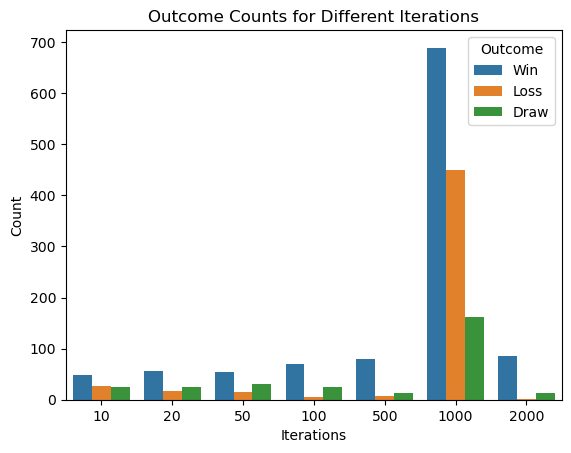

In [78]:

# Create a new DataFrame for plotting
plot_data = pd.DataFrame({
    'num_iter': combined_mcts['num_iter'].unique(),
    'Win': win_data.groupby('num_iter').size(),
    'Loss': loss_data.groupby('num_iter').size(),
    'Draw': draw_data.groupby('num_iter').size().fillna(0)
})

# Melt the DataFrame for Seaborn
plot_data_melted = pd.melt(plot_data, id_vars='num_iter', var_name='Outcome', value_name='Count')

# Create a bar plot
sns.barplot(data=plot_data_melted, x='num_iter', y='Count', hue='Outcome')

# Set plot labels and title
plt.xlabel('Iterations')
plt.ylabel('Count')
plt.title('Outcome Counts for Different Iterations')

# Show the plot
plt.show()